# Video Game Sales

### Подключение библиотек

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Загрузка данных

In [2]:
vgs = pd.read_csv("vgsales.csv")

In [3]:
vgs.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


#### Описание данных

Этот набор данных содержит список видеоигр, продажи которых превысили 100 000 копий.

Name - Название игры

Platform - Платформа выпуска игр (например, PC, PS4 и т.д.)

Year - Год выпуска игры

Genre - Жанр игры

Publisher - Издатель игры

NA_Sales - Продажи в Северной Америке (в миллионах)

EU_Sales - Продажи в Европе (в миллионах)

JP_Sales - Продажи в Японии (в миллионах)

Other_Sales - Продажи в остальном мире (в миллионах)

Global_Sales - Общий объем продаж по всему миру.


##### Выведите размерность и краткую информацию о наборе данных

In [4]:
vgs.shape

(16598, 11)

In [5]:
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


##### Выведите краткую статистическую информацию по набору данных

In [6]:
vgs.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
vgs.describe(include="object")

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


##### Проверьте набор данных на наличие пропущенных и дублирующих значений

In [8]:
vgs.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
vgs.duplicated().sum()

np.int64(0)

#### Напишите краткий вывод о наборе данных

Набор данных содержит 16598 записей и 11 колонок. Дубликатов не выявленно, 
имеются пропущенные значения в некоторых записях. Самая продаваемая игра: Wii Sports.

### Заполнение пустых записей

Удалите пропущенные значения по признаку Publisher, а по признаку Year - замените на среднее значение. Значения по полю Year преобразуйте в целый тип. Удалите признак Rank. После преобразований, убедитесь, что изменения сохранились в наборе данных.

In [10]:
vgs = vgs.dropna(subset=["Publisher"])

In [11]:
mv = vgs["Year"].mean()

In [12]:
vgs["Year"].fillna(mv).astype(int)

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16593    2002
16594    2003
16595    2008
16596    2010
16597    2003
Name: Year, Length: 16540, dtype: int64

In [13]:
vgs.drop(columns="Rank")

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [14]:
vgs.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [15]:
vgs.isnull().sum()

Rank              0
Name              0
Platform          0
Year            249
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [16]:
vgs.shape

(16540, 11)

In [17]:
vgs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16540 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16540 non-null  int64  
 1   Name          16540 non-null  object 
 2   Platform      16540 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16540 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16540 non-null  float64
 7   EU_Sales      16540 non-null  float64
 8   JP_Sales      16540 non-null  float64
 9   Other_Sales   16540 non-null  float64
 10  Global_Sales  16540 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Анализ продаж видеоигр

#### 1. В каком году было выпущено больше всего игр? Выведите первые 10 записей.

In [18]:
year = vgs["Year"].value_counts().sort_values(ascending=False)
year.head(10)

Year
2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
Name: count, dtype: int64

In [19]:
vgs['Year'].value_counts(normalize=False).plot.bar()

<Axes: xlabel='Year'>

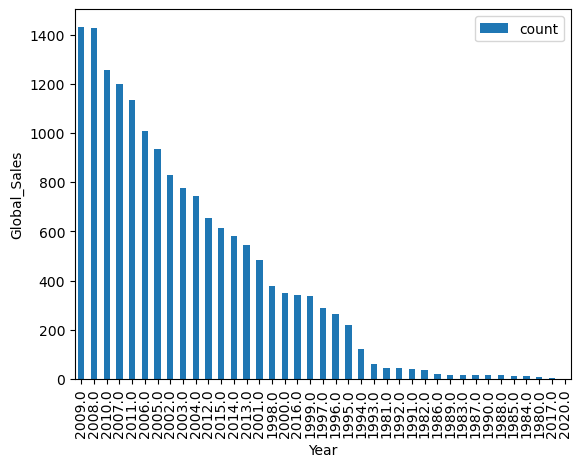

In [20]:
sns.scatterplot(x=vgs["Year"],y=vgs["Global_Sales"])
plt.show()

#### 2. Получите среднюю стоимость продаж в Европе 

In [21]:
vgs['EU_Sales'].mean()

np.float64(0.1468833131801693)

#### 3. Получите максимальную стоимость продаж в Японии и вывведите полную информацию об игре с максимальной суммой продаж

In [22]:
vgs['JP_Sales'].max()

10.22

In [23]:
vgs.sort_values("JP_Sales")[::-1].head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37


##### Выведите первые 10 записей с максимальными суммами продажам в Японии по годам

In [24]:
vgs[['Year','JP_Sales']].groupby('Year').sum().sort_values("Year").tail(10)

,JP_Sales
Year,
2009.0,61.89
2010.0,59.49
2011.0,53.04
2012.0,51.74
2013.0,47.59
2014.0,39.46
2015.0,33.72
2016.0,13.67
2017.0,0.05


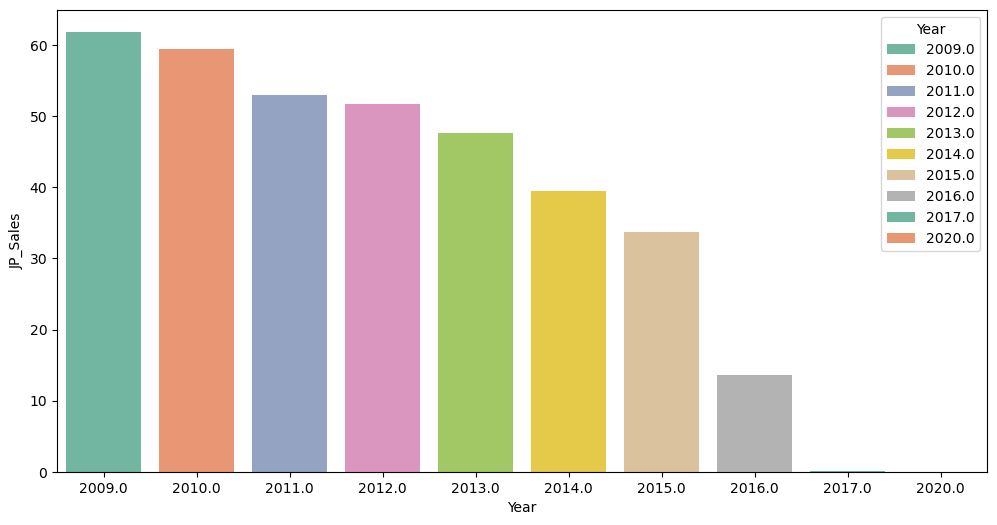

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x='Year', y='JP_Sales', data=vgs[["Year", "JP_Sales"]].groupby('Year').sum().reset_index().sort_values("Year").tail(10), hue='Year', palette="Set2")
plt.show()

#### 4. К какому жанру относится видеоигра "Brain Age 2: More Training in Minutes a Day" video game?

In [26]:
vgs[vgs['Name'] == 'Brain Age 2: More Training in Minutes a Day']['Genre'].iloc[0]

'Puzzle'

#### 5.  Каков объём продаж видеоигры «Grand Theft Auto: Vice City» по всему миру?

In [27]:
vgs[vgs['Name'] == 'Grand Theft Auto: Vice City']['Global_Sales']

24       16.15
13732     0.04
Name: Global_Sales, dtype: float64

#### 6. Выведите название видеоигры, которая имеет самые высокие продажи в Северной Америке.

In [28]:
vgs.loc[vgs['NA_Sales'].idxmax(), 'Name']

'Wii Sports'

#### 7. Выведите видеоигры с самыми низкими продажами в мире

In [29]:
vgs[vgs['Global_Sales'] == vgs['Global_Sales'].min()][['Name', 'Global_Sales']]

,Name,Global_Sales
15980,Turok,0.01
15981,Coven and Labyrinth of Refrain,0.01
15982,Super Battle For Money Sentouchuu: Kyuukyoku n...,0.01
15983,Dragon Zakura DS,0.01
15984,Chameleon: To Dye For!,0.01
...,...,...
16593,Woody Woodpecker in Crazy Castle 5,0.01
16594,Men in Black II: Alien Escape,0.01
16595,SCORE International Baja 1000: The Official Game,0.01
16596,Know How 2,0.01


#### 8. Игр какого жанра было создано больше всего?

In [30]:
vgs['Genre'].nunique()

12

In [31]:
vgs["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [32]:
vgs['Genre'].value_counts()

Genre
Action          3309
Sports          2343
Misc            1712
Role-Playing    1486
Shooter         1308
Adventure       1282
Racing          1248
Platform         884
Simulation       863
Fighting         846
Strategy         678
Puzzle           581
Name: count, dtype: int64

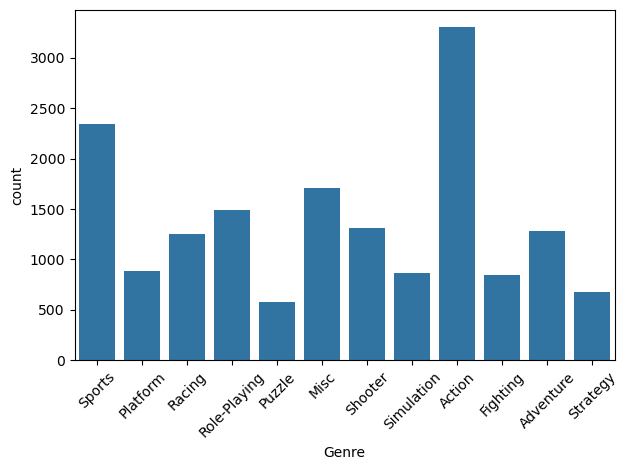

In [33]:
sns.countplot(data=vgs, x='Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 9. Лучшие игры за 5 лет выпуска по жанрам

C:\Users\Albina\AppData\Local\Temp\ipykernel_19188\1035483758.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_games = vgs_selected.groupby(['Year', 'Genre']).apply(lambda x: x.nlargest(1, 'Global_Sales')).reset_index(drop=True)


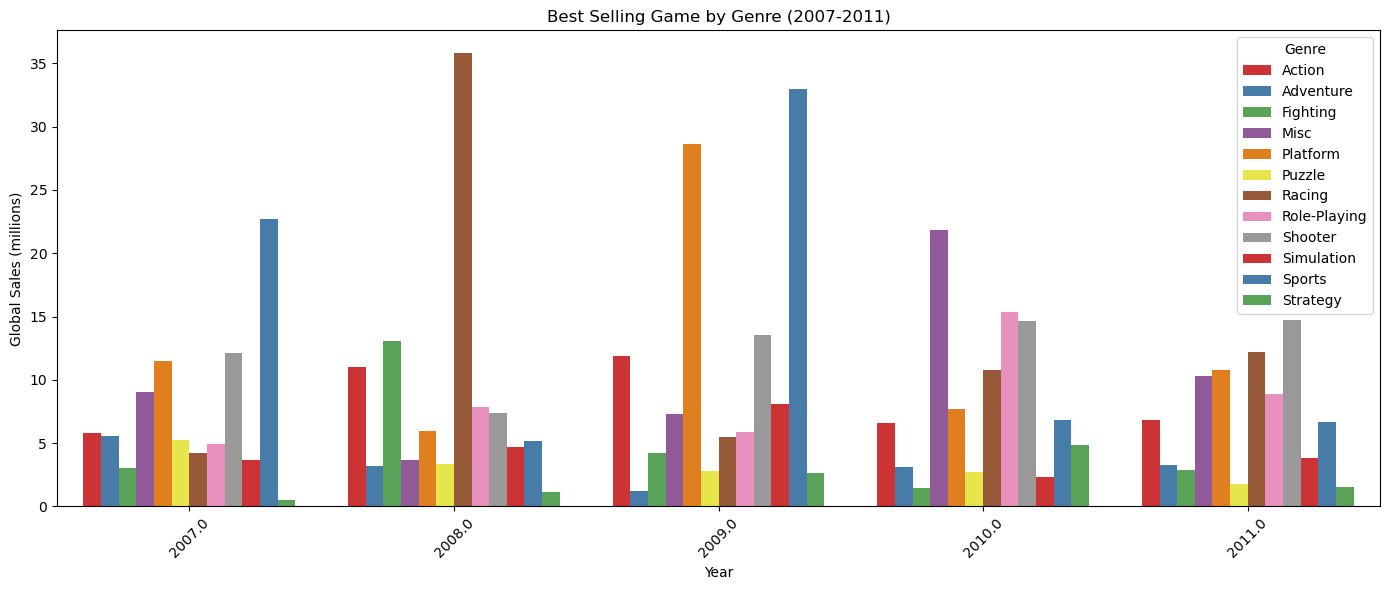

In [34]:
selected_years = [2007, 2008, 2009, 2010, 2011]
vgs_selected = vgs[vgs['Year'].isin(selected_years)]
best_games = vgs_selected.groupby(['Year', 'Genre']).apply(lambda x: x.nlargest(1, 'Global_Sales')).reset_index(drop=True)
plt.figure(figsize=(14,6))
sns.barplot(x='Year', y='Global_Sales', hue='Genre', data=best_games, palette='Set1')
plt.title('Best Selling Game by Genre (2007-2011)')
plt.xlabel('Year')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 10.  В каком году были самые высокие продажи по всему миру?¶

In [35]:
data_year = vgs.groupby('Year')['Global_Sales'].sum().reset_index()
data_year.loc[data_year['Global_Sales'].idxmax()]

Year            2008.0
Global_Sales     678.9
Name: 28, dtype: float64

In [36]:
data_year.head(10)

,Year,Global_Sales
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36
5,1985.0,53.94
6,1986.0,37.07
7,1987.0,21.74
8,1988.0,47.22
9,1989.0,73.45


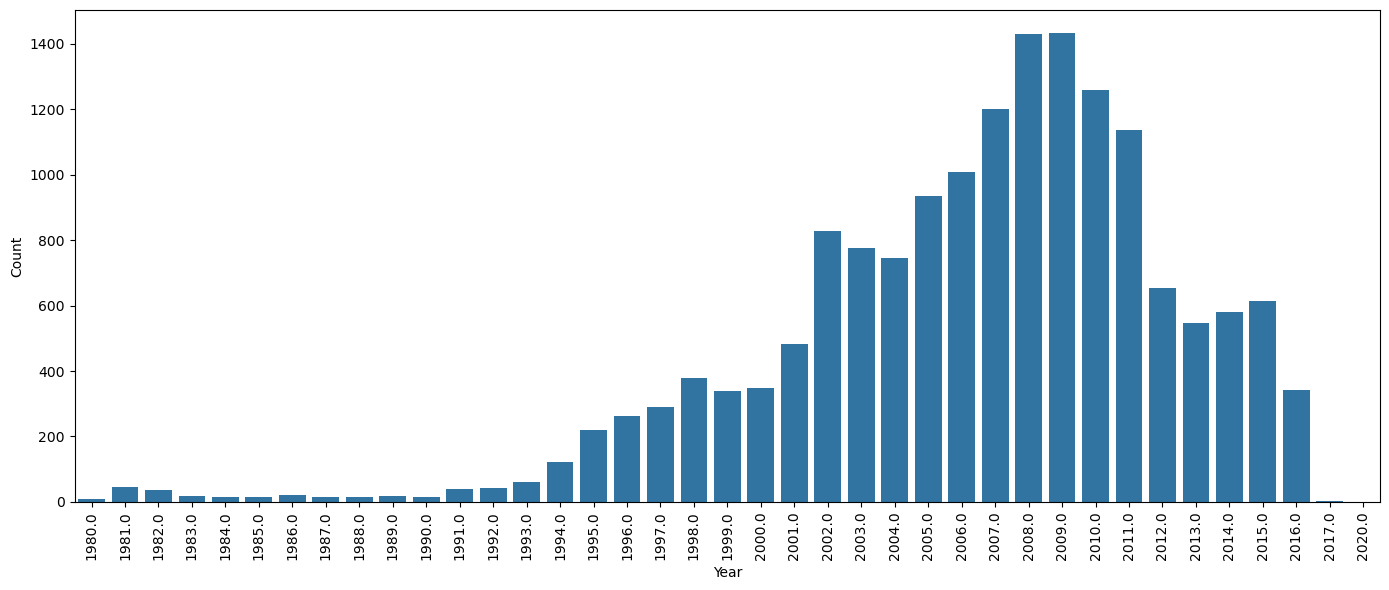

In [37]:
plt.figure(figsize=(14, 6))
sns.countplot(data=vgs, x='Year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### 11. Игры какого жанра имеют самую высокую цену продажи в мире

In [38]:
genre_sales = vgs.groupby('Genre')['Global_Sales'].sum().reset_index()
best_genre = genre_sales.sort_values('Global_Sales', ascending=False)
best_genre = best_genre.iloc[0]
print(best_genre['Genre'])

Action


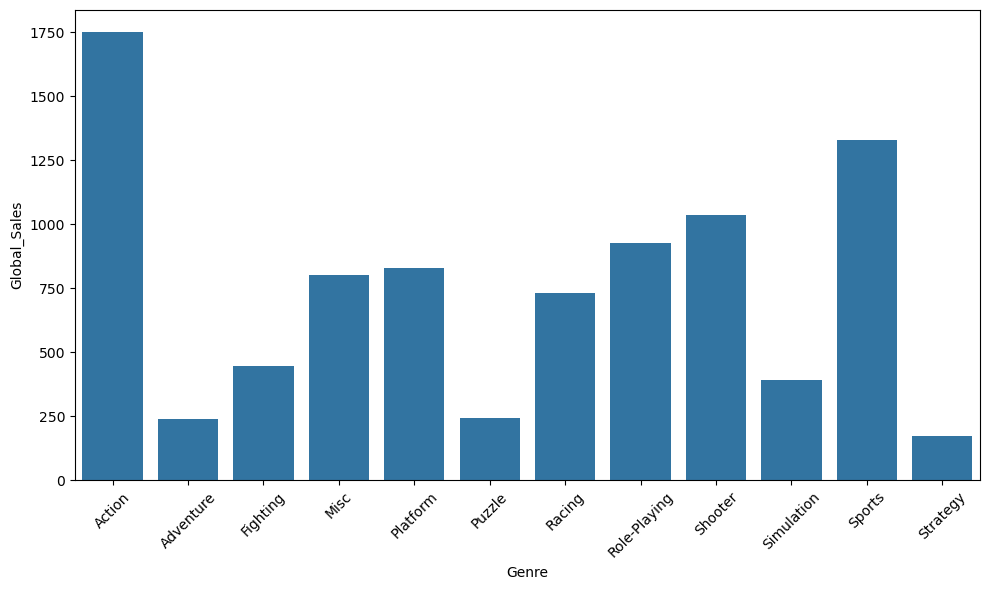

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_sales, x='Genre', y='Global_Sales')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### 12. На какой платформе самая высокая цена продажи в мире?

In [40]:
platform_sales = vgs.groupby('Platform')['Global_Sales'].sum().reset_index()
platform_sales = platform_sales.sort_values('Global_Sales', ascending=False)
best_platform = platform_sales.iloc[0]
print(best_platform['Platform'])

PS2


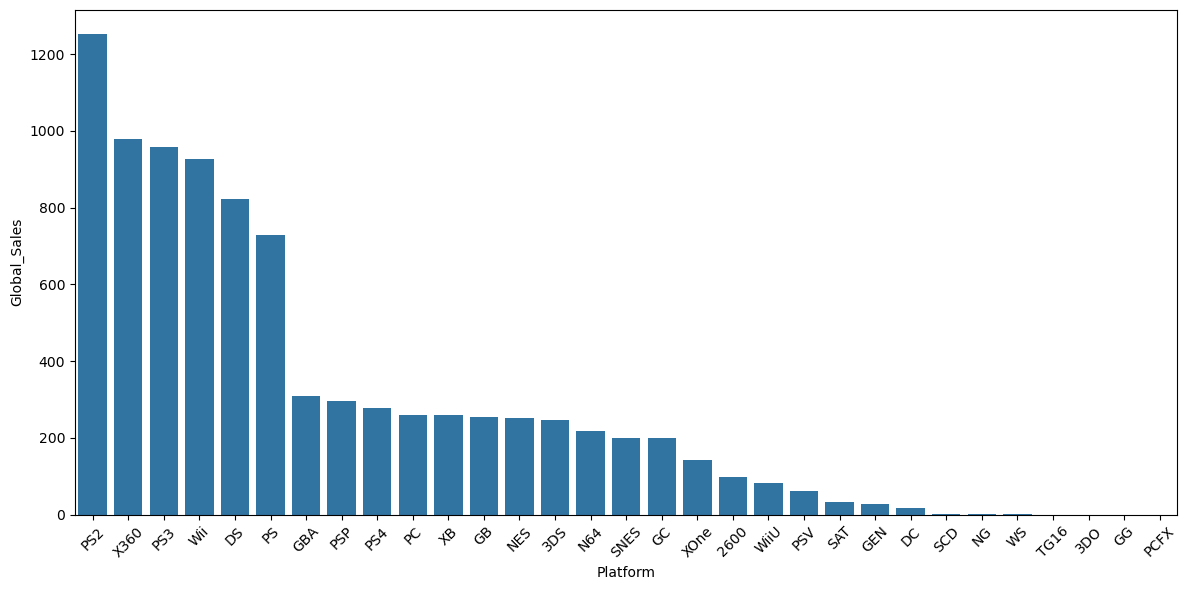

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(data=platform_sales, x='Platform', y='Global_Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 13. Выведите топ 20 Publisher

In [42]:
top20 = (
    vgs['Publisher']
    .value_counts()
    .head(20)
    .reset_index()
)

top20.columns = ['Publisher', 'Count']  # переименуем столбцы
print(top20.head(20))

                                 Publisher  Count
0                          Electronic Arts   1351
1                               Activision    975
2                       Namco Bandai Games    932
3                                  Ubisoft    921
4             Konami Digital Entertainment    832
5                                      THQ    715
6                                 Nintendo    703
7              Sony Computer Entertainment    683
8                                     Sega    639
9                     Take-Two Interactive    413
10                                  Capcom    381
11                                   Atari    363
12                              Tecmo Koei    338
13                             Square Enix    233
14  Warner Bros. Interactive Entertainment    232
15              Disney Interactive Studios    218
16                                 Unknown    203
17                       Eidos Interactive    198
18                            Midway Games    198


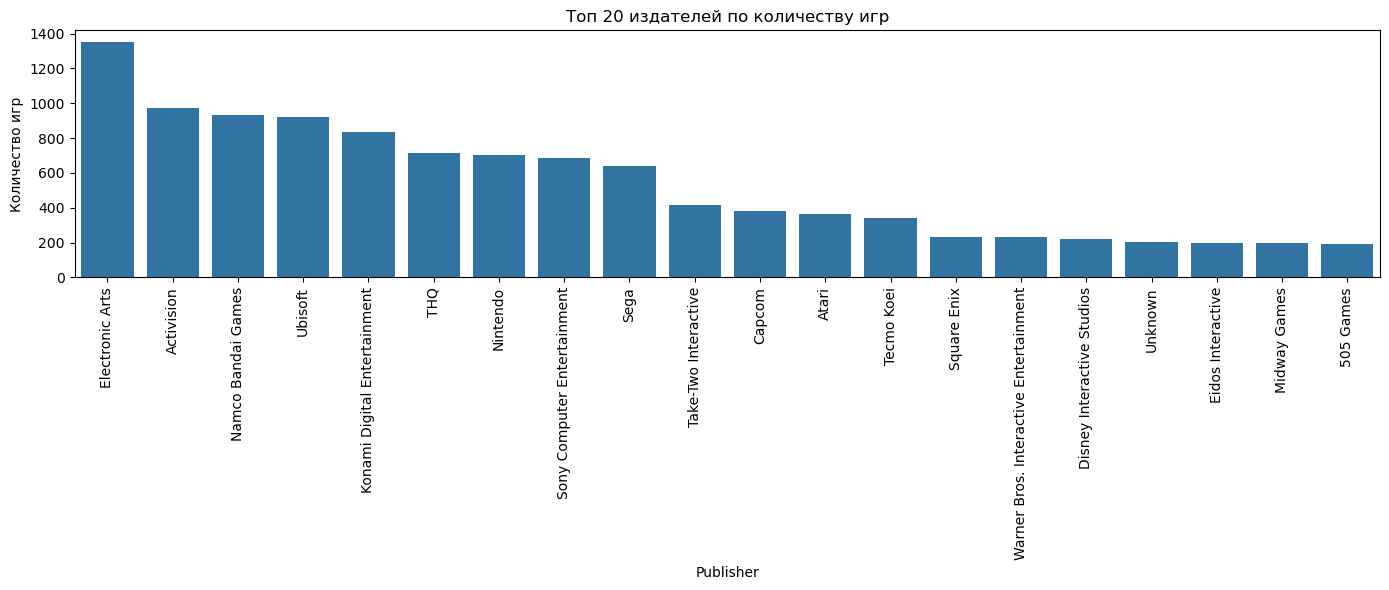

In [43]:
plt.figure(figsize=(14, 6))
sns.barplot(data=top20, x='Publisher', y='Count')
plt.xticks(rotation=90)
plt.xlabel('Publisher')
plt.ylabel('Количество игр')
plt.title('Топ 20 издателей по количеству игр')
plt.tight_layout()
plt.show()

#### 14. Общий доход по регионам

In [44]:
vgs

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [45]:
result = vgs["NA_Sales"].sum()
result

np.float64(4384.41)

In [48]:
data = {
    'Region': ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Others_Sales'],
    'sele': [ vgs["NA_Sales"].sum(),vgs["EU_Sales"].sum() , vgs["JP_Sales"].sum(), vgs["Other_Sales"].sum()],
}

df = pd.DataFrame(data)
print(df)

         Region     sele
0      NA_Sales  4384.41
1      EU_Sales  2429.45
2      JP_Sales  1290.09
3  Others_Sales   797.08


#### 16. Выведите 3 самых распространенных жанра видеоигр в мире

In [49]:
vgs["Genre"].value_counts().head(3)

Genre
Action    3309
Sports    2343
Misc      1712
Name: count, dtype: int64

### 17. В названиях скольких видеоигр есть слово «super» ??

In [50]:
unique_names = vgs['Name'].drop_duplicates()
count_super = unique_names.str.contains('super', case=False, na=False).sum()

In [51]:
print(count_super) 

281
